In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Write a class for perceptron with fit and predict function with sigmoid activation function
class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.b = 0.0
        self.w = None
        self.misclassified_samples = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, x: np.array, y: np.array, n_iter=10):
        self.b = 0.0
        self.w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            errors = 0
            for xi, yi in zip(x, y):
                linear_output = np.dot(xi, self.w) + self.b
                prediction = np.where(self.sigmoid(linear_output) >= 0.5, 1, -1)
                update = self.learning_rate * (yi - prediction)
                self.b += update
                self.w += update * xi
                errors += int(update != 0.0)
            self.misclassified_samples.append(errors)

    def predict(self, x: np.array):
        linear_output = np.dot(x, self.w) + self.b
        return np.where(self.sigmoid(linear_output) >= 0.5, 1, -1)


In [3]:
# Start your main here, read the iris data set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


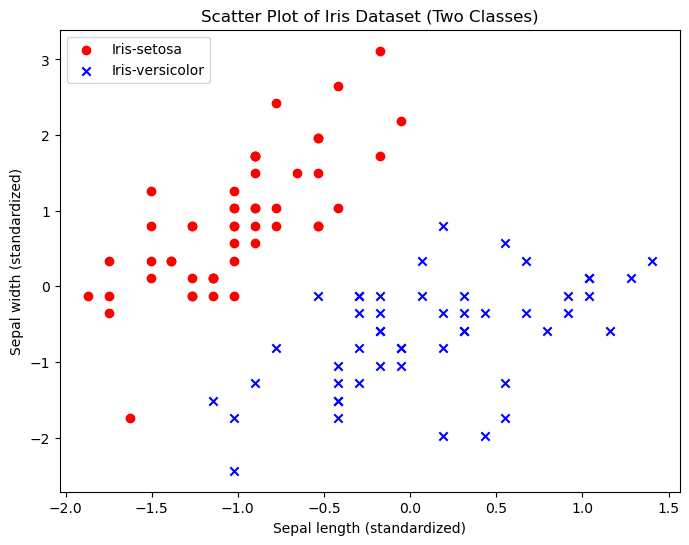

In [10]:
# Optional: Scatter plot to visually check linear separability
plt.figure(figsize=(8, 6))
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Iris-setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='Iris-versicolor')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('Scatter Plot of Iris Dataset (Two Classes)')
plt.legend(loc='upper left')
plt.show()


In [4]:
# map the labels to a binary integer value
y = df.iloc[:, 4].values
x = df.iloc[:, 0:2].values  # Using first two features for binary classification
y = np.where(y == 'Iris-setosa', 1, -1)

In [5]:
# standardization of the input features
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

In [6]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [7]:
# train the model by setting the learning rate as 0.01
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train)

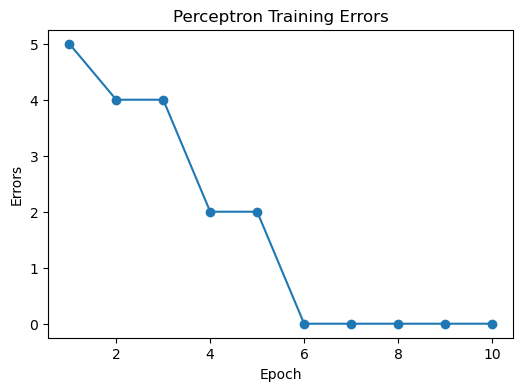

In [8]:
# plot the number of errors during each iteration
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(classifier.misclassified_samples) + 1), classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.title('Perceptron Training Errors')
plt.show()

In [9]:
# print the accuracy
y_pred = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_pred, y_test) * 100)

Accuracy: 100.0
